In [66]:
'''Questions to answer:
   1) How much time the longest journey takes?
   2) Which airline provide maximum no. of longest journey?
   3) Which airline have maximum price?
   4) In which month, price is maximum?
   5) In which day, price is maximum?
 '''

'Questions to answer:\n   1) How much time the longest journey takes?\n   2) Which airline have maximum price?\n   3) In which month, price is maximum?\n   4) In which day, price is maximum?\n '

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_excel('Data_Train.xlsx')

In [69]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [70]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [71]:
# Converting date of journey to pandas datetime format as it will help generate more features such as month, weekday, etc and it will help us with analysis of the price variation depending on the time of the month.

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [72]:
df['weekday']=df['Date_of_Journey'].dt.dayofweek

In [73]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


In [74]:
df['month']=df['Date_of_Journey'].dt.month

In [75]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


# Converting departure and arrival time to datetime format

In [76]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [77]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [78]:
df['duration']=df['Arrival_Time']-df['Dep_Time']

In [79]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-08-17 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,6,3,-149 days +02:50:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-17 05:50:00,2020-08-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,0 days 07:25:00
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-17 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,4,9,-69 days +19:00:00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-08-17 18:05:00,2020-08-17 23:30:00,5h 25m,1 stop,No info,6218,3,12,0 days 05:25:00
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-08-17 16:50:00,2020-08-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,0 days 04:45:00


In [80]:
df.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
weekday                      int64
month                        int64
duration           timedelta64[ns]
dtype: object

In [81]:
df['duration']=pd.to_datetime(df['duration'].astype('timedelta64[D]'))

In [82]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
weekday                     int64
month                       int64
duration           datetime64[ns]
dtype: object

In [83]:
df['duration_hr']=df['duration'].dt.hour

In [84]:
df['duration_min']=df['duration'].dt.minute

In [85]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month,duration,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-08-17 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,6,3,1969-12-31 23:59:59.999999851,23,59
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-17 05:50:00,2020-08-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,1970-01-01 00:00:00.000000000,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-17 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,4,9,1969-12-31 23:59:59.999999931,23,59
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-08-17 18:05:00,2020-08-17 23:30:00,5h 25m,1 stop,No info,6218,3,12,1970-01-01 00:00:00.000000000,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-08-17 16:50:00,2020-08-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,1970-01-01 00:00:00.000000000,0,0


In [86]:
drop=['Date_of_Journey','Dep_Time','Arrival_Time','Duration']

In [87]:
df.drop(drop,inplace=True,axis=1)

In [88]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,weekday,month,duration,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,6,3,1969-12-31 23:59:59.999999851,23,59
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,1970-01-01 00:00:00.000000000,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,4,9,1969-12-31 23:59:59.999999931,23,59
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,3,12,1970-01-01 00:00:00.000000000,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,1970-01-01 00:00:00.000000000,0,0


In [89]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Price                       int64
weekday                     int64
month                       int64
duration           datetime64[ns]
duration_hr                 int64
duration_min                int64
dtype: object

In [90]:
df.describe()

,Price,weekday,month,duration_hr,duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,2.892352,5.534775,9.339511,23.957877
std,4611.359167,1.836058,2.987489,11.295762,28.976084
min,1759.000000,0.000000,1.000000,0.000000,0.000000
25%,5277.000000,1.000000,3.000000,0.000000,0.000000
50%,8372.000000,3.000000,5.000000,0.000000,0.000000
75%,12373.000000,4.000000,6.000000,23.000000,59.000000
max,79512.000000,6.000000,12.000000,23.000000,59.000000


In [91]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,weekday,month,duration,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,6,3,1969-12-31 23:59:59.999999851,23,59
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,1970-01-01 00:00:00.000000000,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,4,9,1969-12-31 23:59:59.999999931,23,59
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,3,12,1970-01-01 00:00:00.000000000,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,1970-01-01 00:00:00.000000000,0,0


In [92]:
df['duration_hr']=df['duration_hr']*60

In [93]:
df['duration_min']=df['duration_min']+df['duration_hr']

In [94]:
df.drop('duration',inplace=True,axis=1)
df.drop('duration_hr',inplace=True,axis=1)

In [95]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,weekday,month,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,6,3,1439
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,4,9,1439
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,3,12,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,0


# How much time the longest journey takes?

In [99]:
max(df['duration_min']) #Converting to hours

1439

In [ ]:
'''There are 1439 minutes are in longest journey, that is approaximately equal to 1 day or 24 hours. '''

# Which airline provide maximum no. of longest journey?

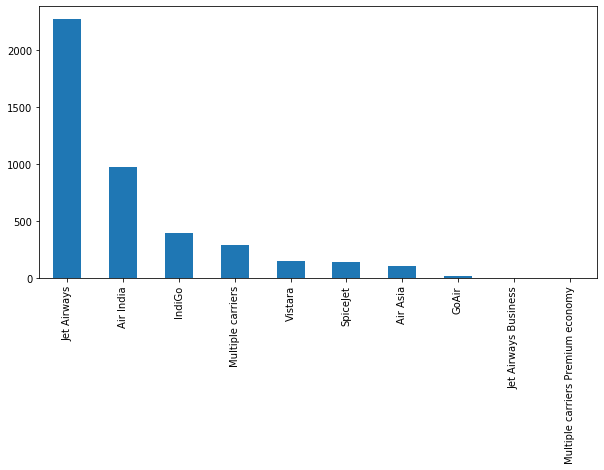

In [107]:
df[df['duration_min']==1439]['Airline'].value_counts().plot.bar()

In [ ]:
'''
jet Airways provide maximum no. of longest journey that is 2267.
'''

In [35]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

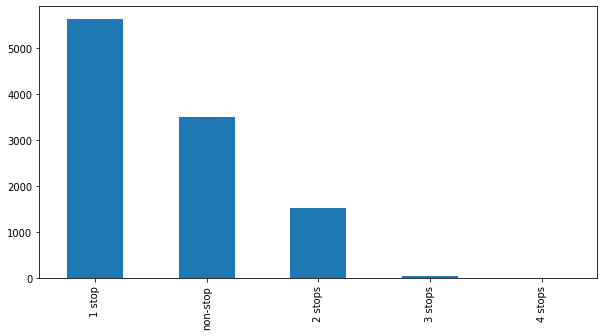

In [108]:
df['Total_Stops'].value_counts().plot.bar()

In [ ]:
'''There are maximum no. of 1 stop journey are there in the data.'''

In [36]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

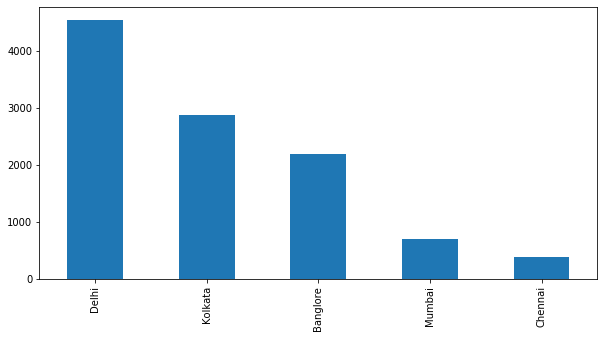

In [109]:
df.Source.value_counts().plot.bar()

In [ ]:
'''There are mostly delhi is source. It is 4537 times shows that many customer are start their jorney from Delhi.'''

In [37]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

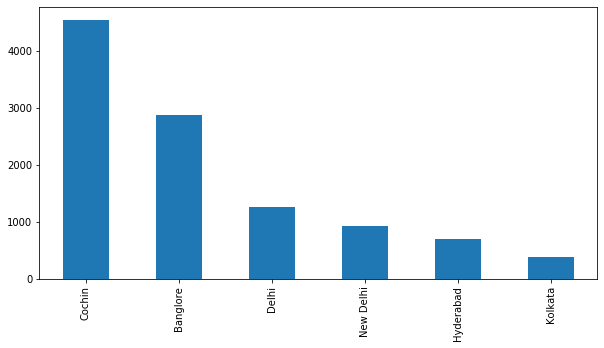

In [110]:
df.Destination.value_counts().plot.bar()

In [ ]:
'''There is most no. of destination is Cochin. Most of the customer has destination as Cochin.'''

In [38]:
df.drop('Route',inplace=True,axis=1)

In [39]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'weekday', 'month', 'duration_min'],
      dtype='object')

In [40]:
col=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'weekday', 'month', 'duration_min']

# Which airline have maximum price?
# In which month, price is maximum?
# In which day, price is maximum?
   

In [41]:
for m in col:
    print(pd.DataFrame(df.groupby(m)['Price'].mean()))

                                          Price
Airline                                        
Air Asia                            5590.260188
Air India                           9611.210616
GoAir                               5861.056701
IndiGo                              5673.682903
Jet Airways                        11643.923357
Jet Airways Business               58358.666667
Multiple carriers                  10902.678094
Multiple carriers Premium economy  11418.846154
SpiceJet                            4338.284841
Trujet                              4140.000000
Vistara                             7796.348643
Vistara Premium economy             8962.333333
                 Price
Source                
Banglore   8017.464269
Chennai    4789.892388
Delhi     10539.439057
Kolkata    9158.389411
Mumbai     5059.708752
                    Price
Destination              
Banglore      9158.389411
Cochin       10539.439057
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata    

In [ ]:
'''Jet Airways Business has earn maximum price of about 58358.666667.
   Delhi has earn maximum price as source is about 10539.439057.
   Delhi has earn maximum price as destination is about 11917.716738.    
   4 stops journey earn maximum price 17686.000000.
   Business class earn maximum price 56811.250000.
   Price is maximum at 4th day of week that is 9805.088646.
   Price is maximum in 1 month of year or january that is 10492.642791.
   '''

# for easy understandability of the info above let us visualize it through graphs.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


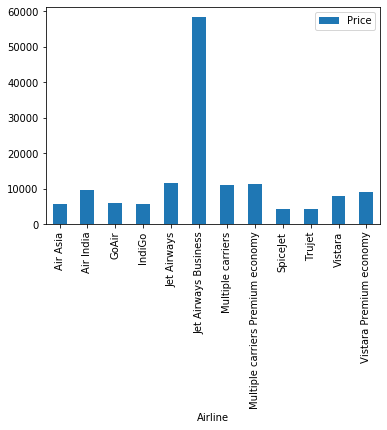

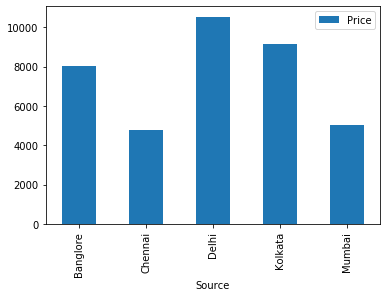

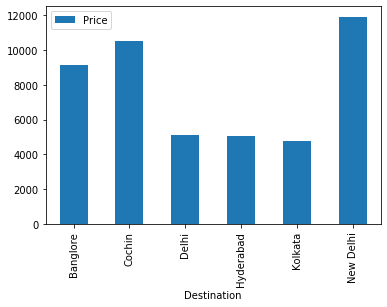

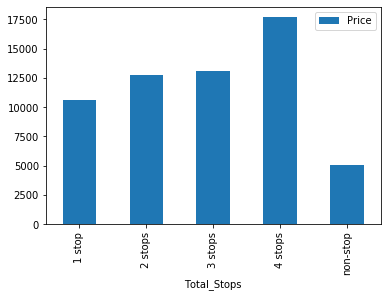

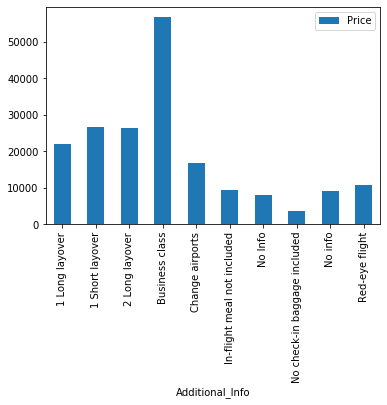

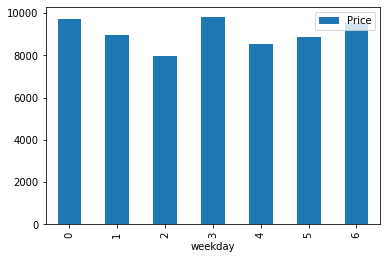

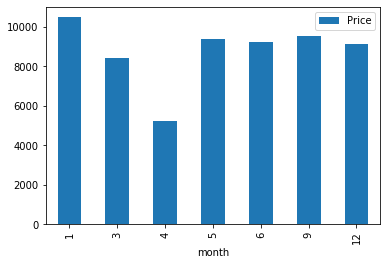

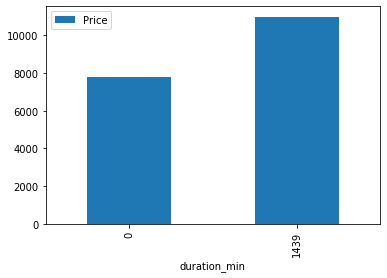

In [42]:
for m in col:
    print(pd.DataFrame(df.groupby(m)['Price'].mean()).plot.bar())

# from the graphs we can observe that.
1)Business class tickets are most expensive.
2)Flight with more stops is more expensive
3)day of the week does not seem to have any significant impact on the price paterns, whereas in the month graph it can be seen that entire year prices are lower in the first quarter as compare to the 3rd and 4th quarter of the year.
4)In the data some flights have 0 mins as there duration, which is definately a data collection error, so we will impute 0 mins with the mean.
5)New Delhi and Delhi are beingh shown as 2 different cities so we will combine them both.

In [43]:
df[df['duration_min']==0]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,weekday,month,duration_min
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,3,12,0
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,0
5,SpiceJet,Kolkata,Banglore,non-stop,No info,3873,0,6,0
9,Multiple carriers,Delhi,Cochin,1 stop,No info,8625,0,5,0
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,2,9,0
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,5,4,0
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,5,4,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,3,1,0


In [44]:
df['duration_min']=df['duration_min'].replace(0,np.nan)

In [45]:
df.replace('New Delhi','Delhi',inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [48]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [49]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price                int64
weekday              int64
month                int64
duration_min       float64
dtype: object

In [50]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'weekday', 'month', 'duration_min'],
      dtype='object')

In [51]:
transform=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
si=SimpleImputer(strategy='most_frequent')
sim=SimpleImputer(strategy='mean')

In [54]:
df['duration_min']=sim.fit_transform(df['duration_min'].values.reshape(-1,1))

In [55]:
df['Total_Stops']=si.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [56]:
for m in transform:
    df[m]=le.fit_transform(df[m])

In [57]:
df['duration_min'].astype(int)

0        1439
1        1439
2        1439
3        1439
4        1439
         ... 
10678    1439
10679    1439
10680    1439
10681    1439
10682    1439
Name: duration_min, Length: 10683, dtype: int64

In [58]:
df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,weekday,month,duration_min
Airline,1.000000,-0.013401,0.070547,0.036064,-0.060802,-0.039520,-0.005488,-0.007918,NaN
Source,-0.013401,1.000000,-0.434227,-0.225601,-0.022107,0.015998,0.063759,0.063052,NaN
Destination,0.070547,-0.434227,1.000000,0.510200,0.071300,-0.262157,-0.104772,-0.068903,NaN
Total_Stops,0.036064,-0.225601,0.510200,1.000000,0.164009,-0.571174,0.002112,-0.056524,NaN
Additional_Info,-0.060802,-0.022107,0.071300,0.164009,1.000000,-0.065478,-0.012681,-0.009098,NaN
Price,-0.039520,0.015998,-0.262157,-0.571174,-0.065478,1.000000,-0.007761,0.010700,NaN
weekday,-0.005488,0.063759,-0.104772,0.002112,-0.012681,-0.007761,1.000000,-0.167990,NaN
month,-0.007918,0.063052,-0.068903,-0.056524,-0.009098,0.010700,-0.167990,1.000000,NaN
duration_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
weekday            0
month              0
duration_min       0
dtype: int64

In [61]:
ss=StandardScaler()

In [62]:
col=df.columns
for m in df.columns:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [63]:
df.dtypes

Airline            float64
Source             float64
Destination        float64
Total_Stops        float64
Additional_Info    float64
Price              float64
weekday            float64
month              float64
duration_min       float64
dtype: object

In [64]:
plt.rcParams['figure.figsize']=(10,5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c0e1759d0>,
      dtype=object)

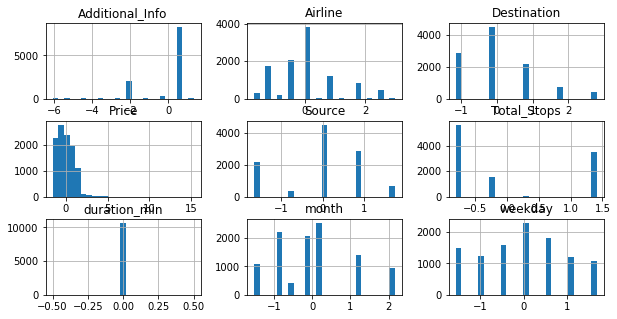

In [65]:
df.hist(bins=25)

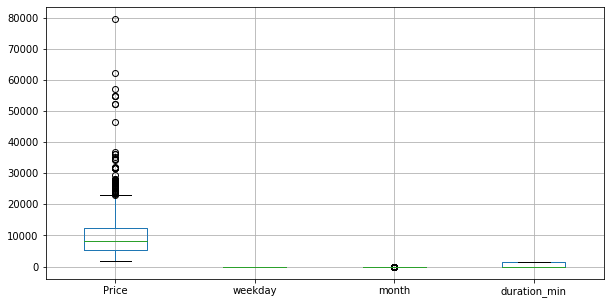

In [111]:
df.boxplot()

In [ ]:
'''There are outliers presents in Price and month columns'''